In [203]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [204]:
# Calling dataset
add=pd.read_excel('train_agriculture1.xlsx')

In [205]:
add

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


Observation - The dataset have 4599 rows and 10 columns, the crop damage columns is target variable which has categorical date so this is classification type of problem.

Id- UniqueID

Estimated_insects_count - Estimated insects count per square meter

crop_type - Category of crop (0,1)

soil_type - category of soil (0,1)

pesticide_use_category - Type of pesticides uses (1-never,2,previously used, 3- currently using)

number_does_week - Number of doses per week

number_weeks_used - number of weeks used

number_weeks_quit - number of weeks quit

season - season category (1,3,2)

crop_damage - Crop damage category (0-olive,1-damaged due to other causes,3- damaged due to preticides)

In [206]:
# Checking data type
add.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

Observation - Id has object data type and all other columns have numeric data type

In [207]:
# Checking columns name
add.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [208]:
# Checking dataset info
add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


Observation - The dataset have 4599 rows and 10 columns.
Also the dataset have missing/null values in Number_weeks_used column.

In [209]:
# Checking null values count
add.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

Observation - The Number_weeks_used column have 442 null values. 

In [210]:
# Checking null values using heatmap
import seaborn as sns
import matplotlib.pyplot as plt

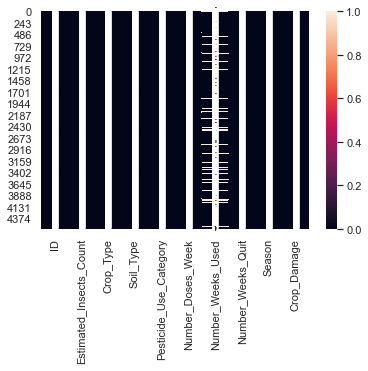

In [211]:
sns.heatmap(add.isnull(),annot=True,linecolor='green')

In [212]:
# Checking crop damage value count

add['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

Observation - 3820-olive 
664-damaged due to other causes
115- damaged due to preticides)

In [213]:
add.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

# Exploring data variables

In [214]:
# Checking unique values

for column in add.columns:
    if add[column].dtype=='int64':
        print(str(column) + ' : ' + str(add[column].unique()))
        print(add[column].value_counts())
        print('*********************************************')
        print('\n')

Estimated_Insects_Count : [ 188  209  257  342  448  577  731 1132 1212 1575 1785 2138 2401 2999
 3516 3895 4096  150  151  168  232  231  256  283  312  311  375  411
  410  488  489  531  626  625  677  732  789  790  851  850  915  916
  984 1056 1296 1297 1385 1478 1576 1678 1786 1898 2015 2016 2139 2267
 2402 2542 2541 2688 2687 2840 3164 3165 3336 3337 3702 3896  169 3515
 4097]
1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64
*********************************************


Crop_Type : [1 0]
0    3565
1    1034
Name: Crop_Type, dtype: int64
*********************************************


Soil_Type : [0 1]
0    2407
1    2192
Name: Soil_Type, dtype: int64
*********************************************


Pesticide_Use_Category : [1 3 2]
2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64
**************************************

In [215]:
add['Number_Weeks_Used'].value_counts()

20.0    209
30.0    194
25.0    165
40.0    133
35.0    128
       ... 
62.0      5
59.0      5
65.0      3
66.0      3
64.0      1
Name: Number_Weeks_Used, Length: 63, dtype: int64

# Check correlation

In [216]:
add_cor=add.corr()
add_cor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.449470,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002237,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.098399,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.387982,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.104022,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.467386,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.011108,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.244988,-0.152918,-0.016196,1.000000


Here we can see correlation between the columns.

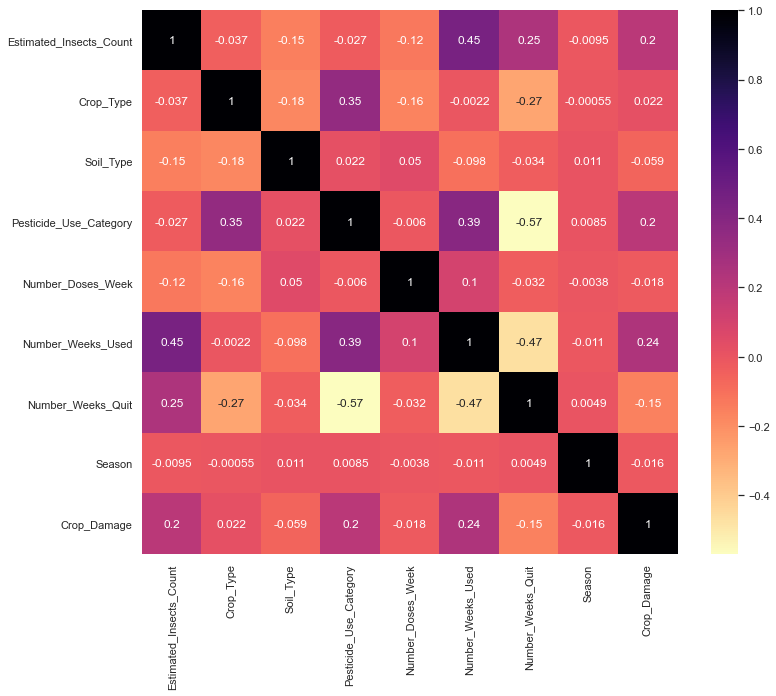

In [217]:
# Using heatmap for better understanding

plt.figure(figsize=(12,10))
sns.heatmap(add_cor,annot=True,cmap='magma_r')
plt.show()

Observation - There is no high correlation between any columns.

Pesticide_use_category minor correlated with crop_type,
number_weeks_used minor correalted with estimated_insects_count.
number_weeks_used minor correalted with pesticide_use_category. 

Text(0.5, 1.0, 'Correlation with target Variable')

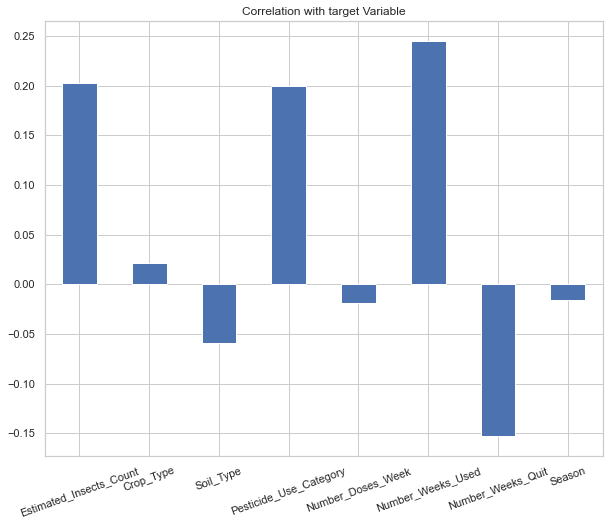

In [218]:
plt.figure(figsize=(10,8))
add.drop('Crop_Damage',axis=1).corrwith(add['Crop_Damage']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('Correlation with target Variable')
                                                                  

Observation - Soil_type, Number_doses_week and number_weeks_quit are negatively correlated with target variable.

Number_weeks_used highly correlated more than other variables.

# Univariate Analysis

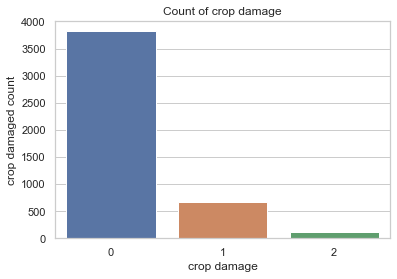

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


In [219]:
# Checking crop damaged count

plt.subplots(figsize=(6,4))
sns.countplot(x='Crop_Damage',data=add)
plt.title('Count of crop damage')
plt.xlabel('crop damage')
plt.ylabel('crop damaged count')
plt.show()

print(add.Crop_Damage.value_counts())

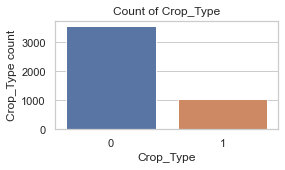

0    3565
1    1034
Name: Crop_Type, dtype: int64


In [220]:
# Checking Crop_Type count

plt.subplots(figsize=(4,2))
sns.countplot(x='Crop_Type',data=add)
plt.title('Count of Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Crop_Type count')
plt.show()

print(add.Crop_Type.value_counts())

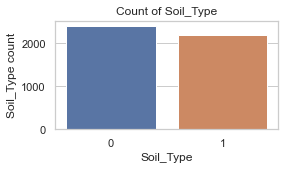

0    2407
1    2192
Name: Soil_Type, dtype: int64


In [221]:
# Checking Soil_Type count

plt.subplots(figsize=(4,2))
sns.countplot(x='Soil_Type',data=add)
plt.title('Count of Soil_Type')
plt.xlabel('Soil_Type')
plt.ylabel('Soil_Type count')
plt.show()

print(add.Soil_Type.value_counts())

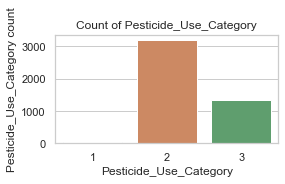

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


In [222]:
# Checking Pesticide_Use_Category count

plt.subplots(figsize=(4,2))
sns.countplot(x='Pesticide_Use_Category',data=add)
plt.title('Count of Pesticide_Use_Category')
plt.xlabel('Pesticide_Use_Category')
plt.ylabel('Pesticide_Use_Category count')
plt.show()

print(add.Pesticide_Use_Category.value_counts())

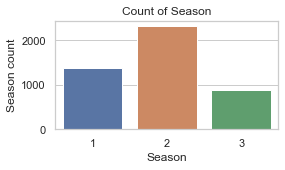

2    2327
1    1379
3     893
Name: Season, dtype: int64


In [223]:
# Checking Season count

plt.subplots(figsize=(4,2))
sns.countplot(x='Season',data=add)
plt.title('Count of Season')
plt.xlabel('Season')
plt.ylabel('Season count')
plt.show()

print(add.Season.value_counts())

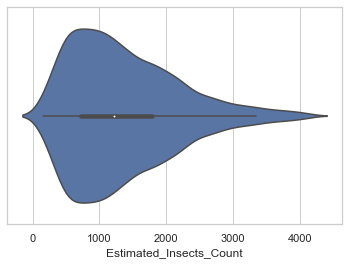

In [224]:
# Checking estimated_insects_count using violinplot.
sns.set(style='whitegrid')
sns.violinplot(add['Estimated_Insects_Count'])
plt.show()

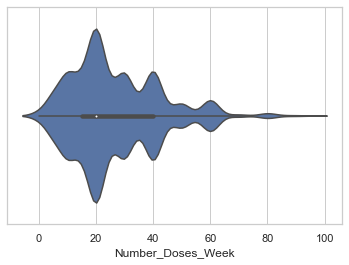

In [225]:
# Checking Number_Doses_Week using violinplot.
sns.set(style='whitegrid')
sns.violinplot(add['Number_Doses_Week'])
plt.show()

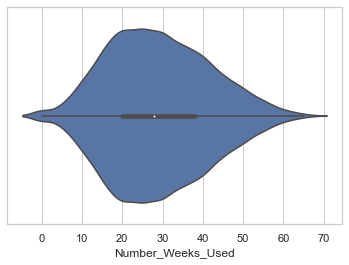

In [226]:
# Checking Number_Weeks_Used using violinplot.
sns.set(style='whitegrid')
sns.violinplot(add['Number_Weeks_Used'])
plt.show()

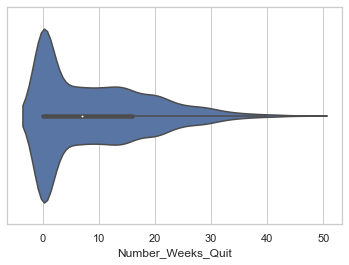

In [227]:
# Checking Number_Weeks_Quit using violinplot.
sns.set(style='whitegrid')
sns.violinplot(add['Number_Weeks_Quit'])
plt.show()

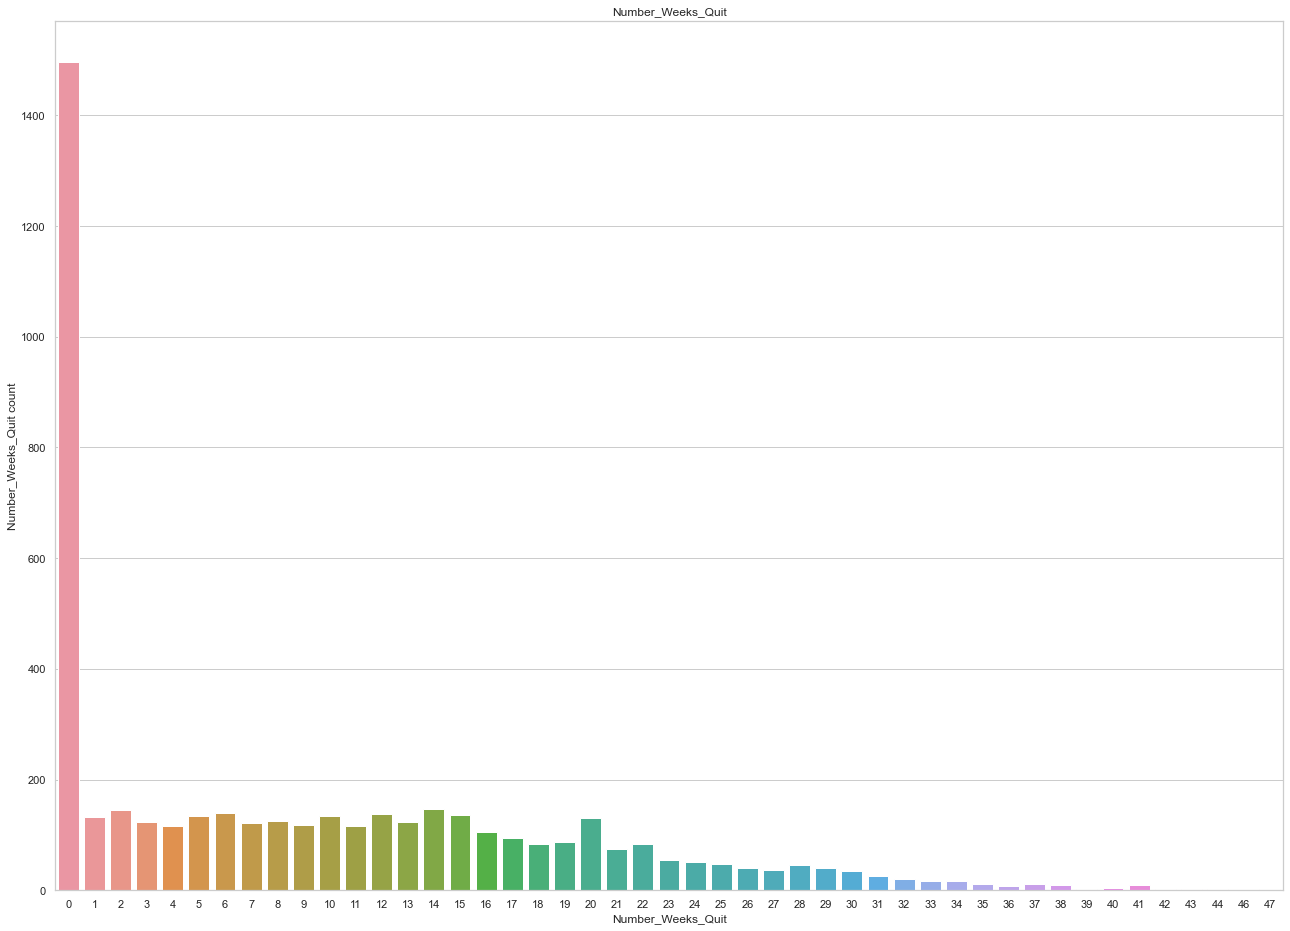

0     1496
14     146
2      145
6      140
12     137
15     136
10     134
5      134
1      133
20     131
8      125
3      124
13     123
7      122
9      118
4      117
11     116
16     105
17      94
19      87
18      83
22      83
21      74
23      54
24      52
25      48
28      46
29      41
26      41
27      37
30      34
31      25
32      21
33      16
34      16
35      11
37      11
41       9
38       9
36       8
40       4
39       3
42       3
44       2
43       2
47       2
46       1
Name: Number_Weeks_Quit, dtype: int64


In [228]:
# Checking Season count

plt.subplots(figsize=(22,16))
sns.countplot(x='Number_Weeks_Quit',data=add)
plt.title('Number_Weeks_Quit')
plt.xlabel('Number_Weeks_Quit')
plt.ylabel('Number_Weeks_Quit count')
plt.show()

print(add.Number_Weeks_Quit.value_counts())

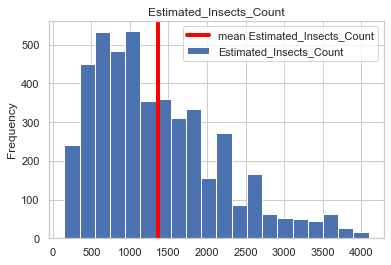

In [229]:
# Checking the mean of Estimated_Insects_Count

add['Estimated_Insects_Count'].plot.hist(bins=20)
mean_val=np.mean(add['Estimated_Insects_Count'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean Estimated_Insects_Count')
plt.title('Estimated_Insects_Count')
plt.legend()
plt.show()

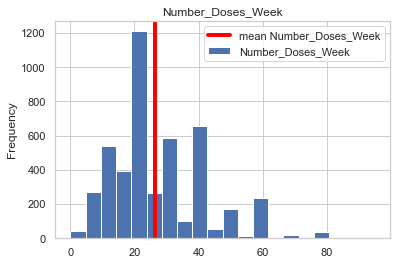

In [230]:
# Checking the mean of Number_Doses_Week

add['Number_Doses_Week'].plot.hist(bins=20)
mean_val=np.mean(add['Number_Doses_Week'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean Number_Doses_Week')
plt.title('Number_Doses_Week')
plt.legend()
plt.show()

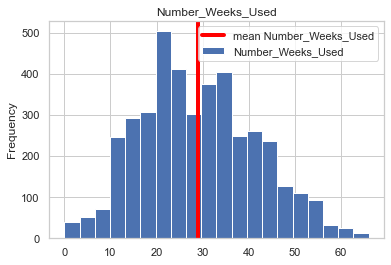

In [231]:
# Checking the mean of Number_Weeks_Used

add['Number_Weeks_Used'].plot.hist(bins=20)
mean_val=np.mean(add['Number_Weeks_Used'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean Number_Weeks_Used')
plt.title('Number_Weeks_Used')
plt.legend()
plt.show()

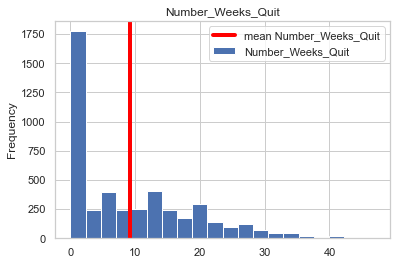

In [232]:
# Checking the mean of Number_Weeks_Quit

add['Number_Weeks_Quit'].plot.hist(bins=20)
mean_val=np.mean(add['Number_Weeks_Quit'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean Number_Weeks_Quit')
plt.title('Number_Weeks_Quit')
plt.legend()
plt.show()

# Bivariate Analysis

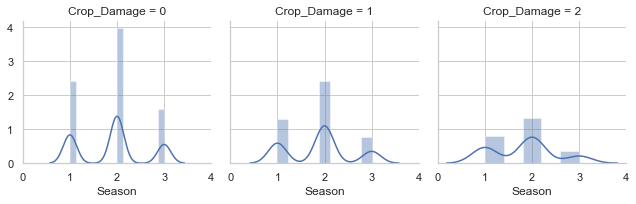

In [233]:
# Exploring season vs crop damaged

facet=sns.FacetGrid(add,col='Crop_Damage')
facet.map(sns.distplot,'Season')
plt.show()

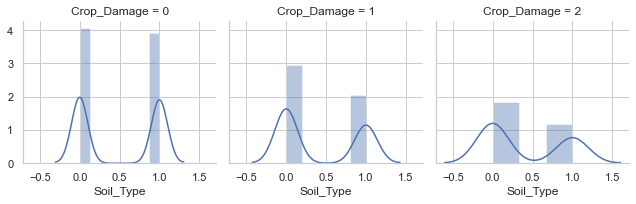

In [234]:
facet=sns.FacetGrid(add,col='Crop_Damage')
facet.map(sns.distplot,'Soil_Type')
plt.show()

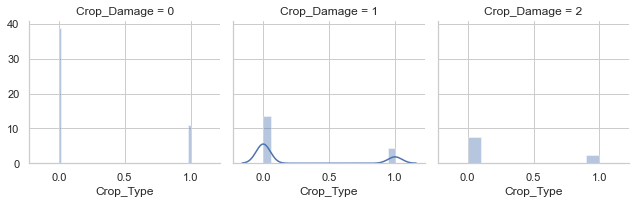

In [235]:
facet=sns.FacetGrid(add,col='Crop_Damage')
facet.map(sns.distplot,'Crop_Type')
plt.show()

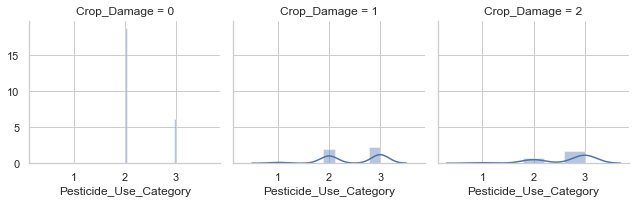

In [236]:
facet=sns.FacetGrid(add,col='Crop_Damage')
facet.map(sns.distplot,'Pesticide_Use_Category')
plt.show()

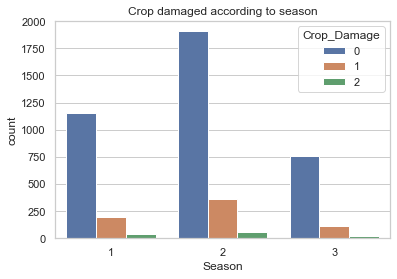

In [237]:
# Season vs crop damaged

sns.countplot(x='Season', hue='Crop_Damage', data=add)
plt.title('Crop damaged according to season')
plt.show()

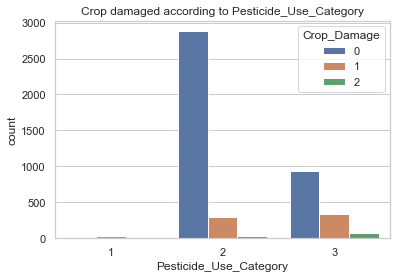

In [238]:
# Pesticide_Use_Category vs crop damaged

sns.countplot(x='Pesticide_Use_Category', hue='Crop_Damage', data=add)
plt.title('Crop damaged according to Pesticide_Use_Category')
plt.show()

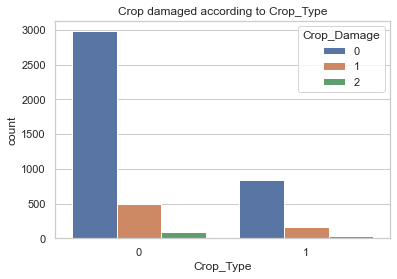

In [239]:
# Crop_Type vs crop damaged

sns.countplot(x='Crop_Type', hue='Crop_Damage', data=add)
plt.title('Crop damaged according to Crop_Type')
plt.show()

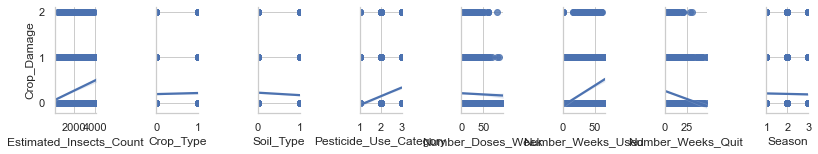

In [240]:
sns.pairplot(add, x_vars=['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week', 'Number_Weeks_Used','Number_Weeks_Quit','Season'], y_vars='Crop_Damage' ,size=2, aspect=0.7, kind='reg')

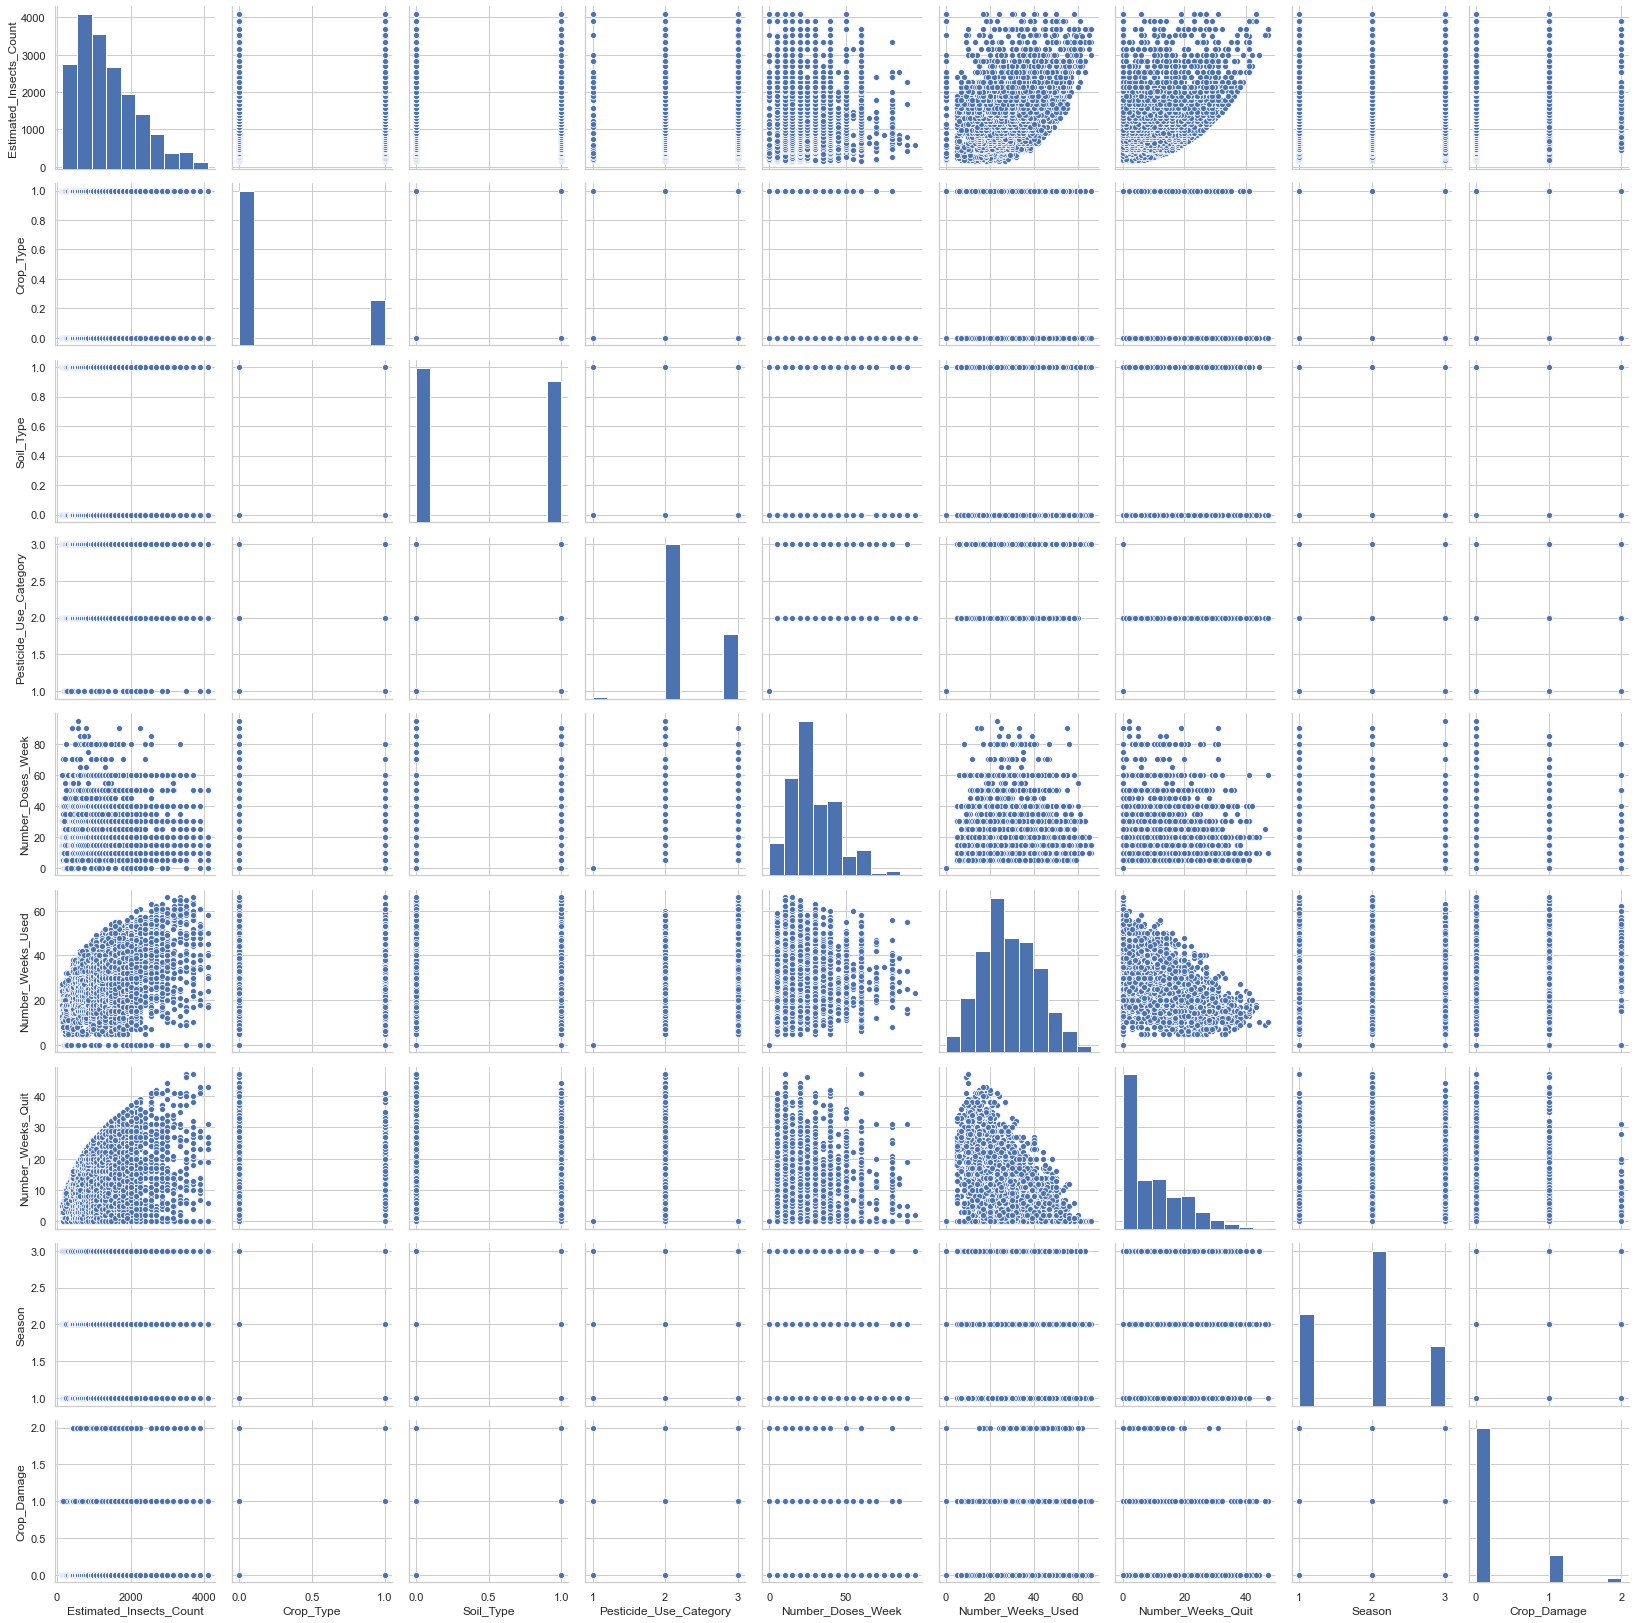

In [241]:
sns.pairplot(data=add)

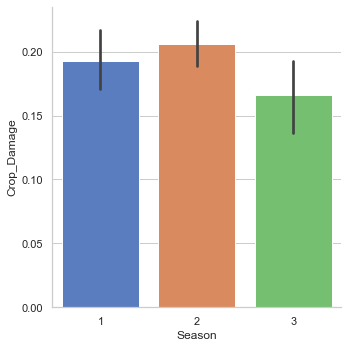

In [242]:
#Factor plot of season vs crop damaged

sns.factorplot(x='Season',y='Crop_Damage',data=add,kind='bar',size=5,palette='muted',aspect=1)
plt.show()

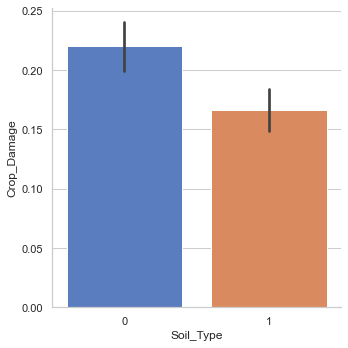

In [243]:
#Factor plot of Soil_Type vs crop damaged

sns.factorplot(x='Soil_Type',y='Crop_Damage',data=add,kind='bar',size=5,palette='muted',aspect=1)
plt.show()

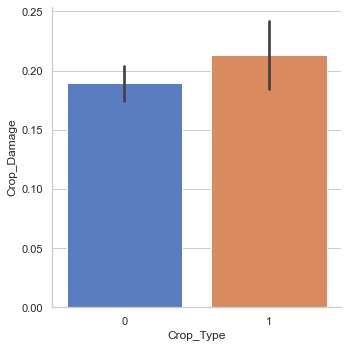

In [244]:
#Factor plot of Soil_Type vs crop damaged

sns.factorplot(x='Crop_Type',y='Crop_Damage',data=add,kind='bar',size=5,palette='muted',aspect=1)
plt.show()

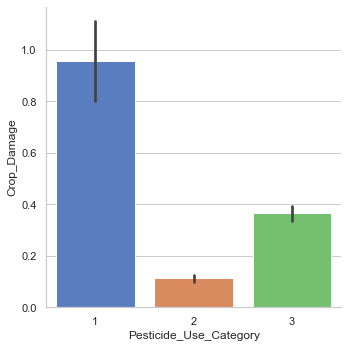

In [245]:
#Factor plot of Pesticide_Use_Category vs crop damaged

sns.factorplot(x='Pesticide_Use_Category',y='Crop_Damage',data=add,kind='bar',size=5,palette='muted',aspect=1)
plt.show()

In [246]:
# Filling null values using mean method.

In [247]:
add['Number_Weeks_Used'].fillna(value=add['Number_Weeks_Used'].mean(),inplace=True)

In [248]:
add.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

# Checking skewness

In [250]:
x.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
dtype: float64

In [251]:
x.skew()
for col in x.skew().index:
    if col in x.describe().columns:
        if x[col].skew()>0.55:
            x[col]=np.sqrt(x[col])
        if x[col].skew()<-0.55:
            x[col]=np.cbrt(x[col]) 

In [252]:
x.skew()

Estimated_Insects_Count    0.257248
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.494443
Number_Doses_Week         -0.002742
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.054299
Season                     0.144841
dtype: float64

In [253]:
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,13.711309,1.0,0,1.000000,0.000000,0.000000,0.000000,1
1,14.456832,1.0,0,1.000000,0.000000,0.000000,0.000000,2
2,16.031220,1.0,0,1.000000,0.000000,0.000000,0.000000,2
3,16.031220,1.0,1,1.000000,0.000000,0.000000,0.000000,2
4,18.493242,1.0,0,1.000000,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...
4594,46.238512,0.0,1,1.414214,4.472136,28.891027,1.000000,1
4595,46.249324,0.0,1,1.414214,5.477226,47.000000,1.414214,1
4596,47.613023,0.0,1,1.414214,3.162278,7.000000,5.196152,2
4597,47.613023,0.0,1,1.414214,3.162278,20.000000,4.898979,2


In [254]:
# Use StandrdScaler method
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [256]:
x=pd.DataFrame(data=x)

In [257]:
x

,0,1,2,3,4,5,6,7
0,-1.972553,1.856819,-0.954294,-3.293711,-3.191182,-2.414732e+00,-1.212439,-1.287027
1,-1.904323,1.856819,-0.954294,-3.293711,-3.191182,-2.414732e+00,-1.212439,0.152078
2,-1.760237,1.856819,-0.954294,-3.293711,-3.191182,-2.414732e+00,-1.212439,0.152078
3,-1.760237,1.856819,1.047895,-3.293711,-3.191182,-2.414732e+00,-1.212439,0.152078
4,-1.534916,1.856819,-0.954294,-3.293711,-3.191182,-2.414732e+00,-1.212439,0.152078
...,...,...,...,...,...,...,...,...
4594,1.004300,-0.538556,1.047895,-0.583487,-0.284696,5.938766e-16,-0.694444,-1.287027
4595,1.005289,-0.538556,1.047895,-0.583487,0.368521,1.513561e+00,-0.479883,-1.287027
4596,1.130094,-0.538556,1.047895,-0.583487,-1.135986,-1.829668e+00,1.479145,0.152078
4597,1.130094,-0.538556,1.047895,-0.583487,-1.135986,-7.431183e-01,1.325210,0.152078


In [260]:
y

,Crop_Damage
0,0
1,1
2,1
3,1
4,1
...,...
4594,1
4595,1
4596,0
4597,0


In [261]:
# Make input and output variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [263]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

model=[GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of GaussianNB() is:
0.8304347826086956
[[902  58   0]
 [111  53   0]
 [ 15  11   0]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       960
           1       0.43      0.32      0.37       164
           2       0.00      0.00      0.00        26

    accuracy                           0.83      1150
   macro avg       0.44      0.42      0.43      1150
weighted avg       0.79      0.83      0.81      1150



Accuracy score of SVC() is:
0.8417391304347827
[[959   1   0]
 [155   9   0]
 [ 25   1   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       960
           1       0.82      0.05      0.10       164
           2       0.00      0.00      0.00        26

    accuracy                           0.84      1150
   macro avg       0.55      0.35      0.34      1150
weighted avg       0.82      0.84      0.78      1150



Accuracy score of DecisionTreeClassifier(

In [264]:
# Finding out best paramter using GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[0,1,2,3,4,5,6,7,8,9,10,11,12]}
svc=SVC()
gs=GridSearchCV(svc,parameters)
gs.fit(x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [265]:
print(gs.best_params_)


{'C': 1, 'kernel': 'poly'}


In [266]:
#Using SVC model with best results
sv=SVC(kernel='poly',C=1)
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print('Accuracy score of',sv, 'is:')
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))
print('\n')

Accuracy score of SVC(C=1, kernel='poly') is:
0.8417391304347827
[[959   1   0]
 [155   9   0]
 [ 25   1   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       960
           1       0.82      0.05      0.10       164
           2       0.00      0.00      0.00        26

    accuracy                           0.84      1150
   macro avg       0.55      0.35      0.34      1150
weighted avg       0.82      0.84      0.78      1150





# Using Ensemble Technique to boostup score

In [267]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42,criterion='gini')
#RandomForestClassifier(100)---Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8295652173913044
[[921  37   2]
 [130  33   1]
 [ 20   6   0]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       960
           1       0.43      0.20      0.27       164
           2       0.00      0.00      0.00        26

    accuracy                           0.83      1150
   macro avg       0.43      0.39      0.39      1150
weighted avg       0.78      0.83      0.80      1150



In [268]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100,random_state=42,base_estimator=sv,algorithm='SAMME',learning_rate=0.01)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8347826086956521
[[960   0   0]
 [164   0   0]
 [ 26   0   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       960
           1       0.00      0.00      0.00       164
           2       0.00      0.00      0.00        26

    accuracy                           0.83      1150
   macro avg       0.28      0.33      0.30      1150
weighted avg       0.70      0.83      0.76      1150



In [269]:
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8426086956521739
[[949  11   0]
 [144  20   0]
 [ 21   5   0]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       960
           1       0.56      0.12      0.20       164
           2       0.00      0.00      0.00        26

    accuracy                           0.84      1150
   macro avg       0.47      0.37      0.37      1150
weighted avg       0.79      0.84      0.79      1150



In [270]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

gb.fit(x_train,y_train)

gba=gb.predict(x_test)
print(accuracy_score(y_test,gba))
print(confusion_matrix(y_test,gba))
print(classification_report(y_test,gba))

0.8443478260869566
[[947  12   1]
 [140  24   0]
 [ 21   5   0]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       960
           1       0.59      0.15      0.23       164
           2       0.00      0.00      0.00        26

    accuracy                           0.84      1150
   macro avg       0.48      0.38      0.38      1150
weighted avg       0.80      0.84      0.80      1150



In [282]:
# Cross validate of GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(gb,x,y,cv=5,scoring='accuracy')
print('Score:', score)
print('Mean Score:', score.std())
print('Standard Deviation:', score.std())

Score: [0.80652174 0.81956522 0.83369565 0.82065217 0.82589771]
Mean Score: 0.008906309083321098
Standard Deviation: 0.008906309083321098


Note - Find out best result with GradientBoostingClassifier by using varius technics. So i will save GradientBoostingClassifier as my final model.

In [283]:
# Saving the GradientBoostingClassifier
import joblib
joblib.dump(gb,'Agriculture Dataset Evaluation project.pkl')

['Agriculture Dataset Evaluation project.pkl']